# Unsupervised Machine Learning
---

**Unsupervised Machine Learning** is a subset of Machine Learning which works with *unlabelled data*. Instead of making predictions, Unsupervised ML models aim to **find hiddent structures in the data**. We can motivate the use of Unsupervised ML in the context of **Clustering**, the **K-Means Algorithm** and how to *evaluate its performance.*


In [23]:
# Imports:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

---
## Clustering:
- **Clustering** is an *Unsupervised ML method* of identifying and grouping similar data points in large datasets.
-  Unlike Classification, which works with grouping *labelled data*, Clustering works with *unlabelled data*, which means that the model learns from the data **without** supervision.
- When finding patterns in the data, *more than one right answer*.

<center>
    <div>
        <img src="./Images/Clustering.JPG"/>
    </div>
</center>

---
## K-Means Clustering:

**K-Means** simple and popular clustering algorithm where:
- <font color=#14F278>**K**</font> denotes the chosen number of *clusters* (a hyperparameter)
- The true number of clusters is generally *unknown*

<center>
    <div>
        <img src="./Images/K_Means_Clustering_Method.JPG"/>
    </div>
</center>

---
### Notes on K-Means Clustering:
- K-Means is ***not* suitable for categorical data**
- There are variations of K-Means available:
    - For example, there is **K-Modes** algorithm (available through `kmodes` Python package) that supports categorical variables
    - Another variation is called **K-Prototypes**, which combines K-Means and K-Modes to support both numerical and categorical data and is also available through the above package
    - *K-Medoids* is yet another variation where the cluster centroids are *forced to be actual data points* (available through `scikit-learn-extra` Python package).  

---
## Performance of Clustering Algorithms:
- When evaluating Supervised models, we compare the predicted outputs `y_pred` with the actual outputs `y_test`
- This approach is *not suitable for Unsupervised models* as there is no `y_test` that is able to be defined (since we are workin with *unlabelled data*)
- Instead, there are a couple of approaches that can be leveraged to evaluate the performance (i.e., to determine the *optimal number of clusters*):
    - **Elbow Method**
    - **Silhouette Analysis**

---
### Elbow Method:
The **Elbow Method** is used to determine the *ideal number of clusters* for a dataset:
- The value of 'K' is incrementally increased, and for each increment, we fit a new model and then plot the **total sum of squared differences** of all the  samples to their closest cluster
- In `sklearn` this can be obtained from the `inertia_` attribute of K-Means
- **Inertia** is the **measure of intra-cluster distances**, i.e. how far away the datapoint is, relative to its centroid
- Once we plot the inertia against 'K', we then search for the <font color=#14F278>**elbow region**</font> of the plot as the **optimal 'K' value**:

<center>
    <div>
        <img src="./Images/Elbow_Method.JPG"/>
    </div>
</center>

---
### Silhouette Analysis:

A **Silhouette Plot** can be used to display how well the clusters are *separated from each other*:
- The plot consists of the **silhouette scores** ranging from -1 to 1, which measure *how close each point in one cluster is to points in neighbouring clusters*:
- To calculate the silhouette score of a data point $i$ in cluster $C_{i}$:
    - First, find the average distance between point $i$ and all other points in cluster $C_{i}$, given by $a(i)$
    - Next, find the average distance between point $i$ and all other points across all other clusters. Take the lowest average distance, defined by $b(i)$ (that is, the average distance to the closest cluster)
    - The <font color=#14F278>**silhouette score $s(i)$ for point $i$**</font> is then given by the formula:
$$
s(i) = \frac{b(i) - a(i)}{max\{a(i), b(i)\}}
$$

- Values close to 1 **are good**
- Values close to 0 indicate that the **data points are close to boundary between 2 clusters**
- Negative values indicate **incorrect cluster "classification" for a point**. This means that for a given sample, it is closer *on average* to the data points in a neighbouring cluster than to the samples in its own cluster:

<center>
    <div>
        <img src="./Images/Silhouette_Analysis.JPG"/>
    </div>
</center>


---
## Clustering in Python:

---
### K-Means Fit-Predict:
- We can apply **K-Means Clustering** with `sklearn` and on the dataset `mouse.csv`
- Dataset Summary:
    - The data consists of 500 observations
    - There are 3 values per observation - `x_coord`, `y_coord` and `region`
    - Essentially, the first two columns give us the data point coordinates in a 2D space:
- We can also visualise the distribution of observations in 2D space via a **Scatter Plot**

In [24]:
# Loading the dataset:

filepath = r'./Data/mouse.csv'
df = pd.read_csv(filepath)
df.head()

,x_coord,y_coord,region
0,0.456601,0.432806,Head
1,0.611378,0.528625,Head
2,0.450299,0.711606,Head
3,0.639015,0.460744,Head
4,0.628957,0.323470,Head


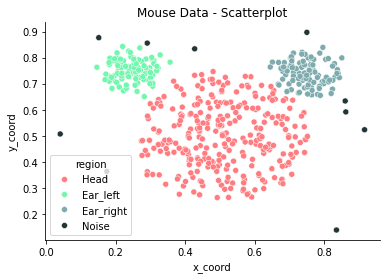

In [25]:
# Visualising the observations via a Scatter Plot

hue_colours = {'Head':'#FF7C80', 'Ear_left': '#72F7AE', 'Ear_right':'#7EABAD', 'Noise':'#223536'}
g = sns.scatterplot(x = 'x_coord', y= 'y_coord', data = df, hue = 'region', palette=hue_colours)
g.set_title('Mouse Data - Scatterplot')
sns.despine()
plt.show()

Proceeding with **K-Means**, since this is an **Unsupervised ML problem**, we only need to make use of the first two columns: `x_coord` and `y_coord`. The aim is to see if our clustering model will be able to *identify the correct regions* from the original data. The general steps are as follows:
- To initialise the model, use `KMeans` from `sklearn.cluster`
- Set the number of clusters to 3 with `n_clusters=3`
- Like any other ML model, `KMeans` also implements a `.fit()` and `.predict()` method
- Once the model is fit to the data, we can retrieve the >**Cluster Centre Information**, which, in this case, will be the *coordinates of each centroid*, but we can also use this information to build a better understanding of how the perfect observation per cluster looks like

In [26]:
# Select the data for the Clustering
X = df[['x_coord', 'y_coord']]

# Initialising the K-Means model with 3 clusters
KMeansModel = KMeans(n_clusters = 3, n_init = 'auto')

# Fit model to the data
KMeansModel.fit(X)
print(f'The cluster centres are positioned at {KMeansModel.cluster_centers_}')

The cluster centres are positioned at [[0.71388901 0.69441221]
 [0.27314064 0.7342095 ]
 [0.49256575 0.44799432]]


In [27]:
# Predicting Clusters for all observations
# The Output wil be in the form of a numpy array
# Clusters will be assigned an integer notation, starting from 0 - e.g., 0, 1, 2
y_pred = KMeansModel.predict(X)
y_pred

array([2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 1, 2, 2, 2, 2,
       0, 2, 0, 1, 2, 2, 2, 0, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2,
       1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 0,
       2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

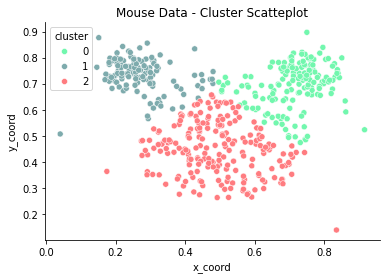

In [28]:
# We can visualise a second Scatter Plot with the produced clusters from the KMeans model

# First, create a dataframe that contains both the feature data and the predicted cluster as columns
cluster_df = X.copy()
cluster_df['cluster'] = y_pred

# Produce a Scatter Plot
hue_colours = {2:'#FF7C80', 0: '#72F7AE', 1:'#7EABAD'}
g = sns.scatterplot(x = 'x_coord', y= 'y_coord', data = cluster_df, hue = 'cluster', palette=hue_colours)
g.set_title('Mouse Data - Cluster Scatteplot')
sns.despine()
plt.show()


---
### K-Means Evaluation in Python:
Previously, we **assumed 3 clusters** in the  K-Means model, because we were led by the initial dataset, indicating 3 regions (and an extra one, capturing noise). However in real life setups, typically the optimal number of clusters would be difficult to determine. We can use some methods to uncover the *optimal number of clusters*. In such instances, we can perform the **Elbow Method** or **Silhouette Analysis**.

#### Elbow Method:

For the **Elbow Method**, we can iterate through a range of clusters, train a model each time and collect the *Model Inertia*:
   - Inertia information is available in the `.inertia_` attribute of the KMeans model
   - Once the Inertia is calculated, we can plot a **K vs Inertia** as a Lineplot and determine the *Elbow Region*

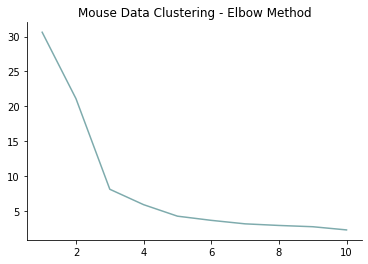

In [29]:
# Create a container for the Sum of Squared Errors (that is Intra-Cluster Differences)
KMeans_SSE_Container = []

# Iterate over a range of clusters - e.g. from 1 to 10
# On each iteration fit a model and append its inertia to the container
for k in range(1,11):
    KMeansModelElbow = KMeans(n_clusters=k, n_init = 'auto')
    KMeansModelElbow.fit(X)
    KMeans_SSE_Container.append(KMeansModelElbow.inertia_)


# Plot the number of clusters against the inertia to identify the elbow region

x = np.arange(1,11)
g = sns.lineplot(x=x, y = KMeans_SSE_Container, color = '#7EABAD')
g.set_title('Mouse Data Clustering - Elbow Method')
sns.despine()
plt.show()

#### Silhouette Analysis:

In terms of **Silhouette Analysis**, there are two approaches we can take:
- The First Approach is to calculate the ***Model Silhouette Score*** for a range of possible clusters:
    - This involves looping through a range of clusters, fitting a model, making predictions and calculating the silhouette score
    - To calculate the score, use the `silhouette_score()` function from `sklearn.metrics`
    - Plot the scores and pick the number of clusters that *maximises* the **Silhouette Score**
- The Second Approach is a more granular one, where we also calculate the ***Silhouette Score for each observation***:
    - This is available via the `silhouette_samples()` function from `sklearn.metrics`
    - You can use this approach when you want to drill down on a sample level

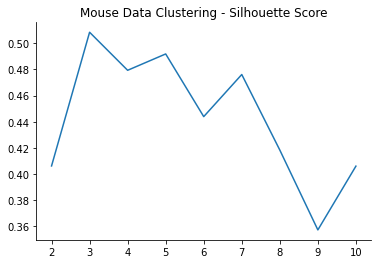

In [30]:
# Silhouette score across Models

# Create a container for the Silhouette Scores
KMeans_Silhouette_Container = []

# Iterate over a range of clusters - e.g. from 2 to 10
# On each iteration fit a model and append its inertia to the container
# Note - for a Silhouette Analysis we require at least 2 clusters

for k in range(2,11):
    KMeansModelSilhouette = KMeans(n_clusters=k, n_init = 'auto')
    KMeansModelSilhouette.fit(X)
    y_pred = KMeansModelSilhouette.predict(X)
    KMeans_Silhouette_Container.append(silhouette_score(X,y_pred))


# Plot the number of clusters against the silhouette score to identify optimal k
x = np.arange(2,11)
g = sns.lineplot(x=x, y = KMeans_Silhouette_Container)
g.set_title('Mouse Data Clustering - Silhouette Score')
sns.despine()
plt.show()

In [31]:
# Silhouette Score across Samples for a given model:
# Once we have identified a candidate for the number of clusters - here 3, we can drill down on sample level

# Fit a model with the given number of clusters
KMeansModelSilhouetteCluster3 = KMeans(n_clusters = 3, n_init = 'auto')
KMeansModelSilhouetteCluster3.fit(X)
y_pred = KMeansModelSilhouetteCluster3.predict(X)

In [38]:
# Use predictions to feed into silhouette_samples() function
sample_silhouette_values = silhouette_samples(X,y_pred)

# Concatenate predicted clusters with their silhouette scores per sample
silhouette_df = pd.DataFrame({'cluster':y_pred, 'sil_score':sample_silhouette_values})
silhouette_df.head()

,cluster,sil_score
0,2,0.610561
1,2,0.109309
2,1,0.306077
3,2,0.266078
4,2,0.440812


In [39]:
# Next, a bit of data preparation for the Silhouette Plot

# First, let's sort our observations per cluster and silhouette score
silhouette_df.sort_values(['cluster', 'sil_score'], inplace=True)

# Next, let's reset the index and import it, so that the index increases in the same order as cluster and sil_score
silhouette_df.reset_index(inplace=True, drop=True)
silhouette_df.reset_index(inplace=True)
silhouette_df

,index,cluster,sil_score
0,0,0,-0.006815
1,1,0,0.077771
2,2,0,0.079879
3,3,0,0.080618
4,4,0,0.089393
...,...,...,...
495,495,2,0.625362
496,496,2,0.626723
497,497,2,0.628119
498,498,2,0.629148


In [40]:

# For the visual, we can also use the model silhouette score (to compare observations against the average)
silhouette_AvgScore = silhouette_score(X,y_pred)
silhouette_AvgScore

0.5084881979875632

C:\Users\prani\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


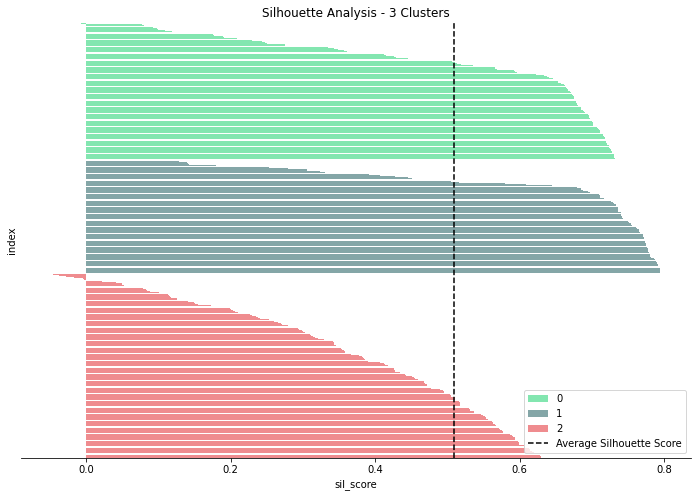

In [41]:
# Lastly, let's visualise the Silhouette Plot for all 500 observations

fig, ax = plt.subplots(figsize = (12,8))    # Customise the size of the visual
hue_colours = {2:'#FF7C80', 0: '#72F7AE', 1:'#7EABAD'}
g = sns.barplot(x = 'sil_score', y = 'index', data = silhouette_df, hue = 'cluster', orient = 'h', ax = ax, palette = hue_colours)      # create horizontal bars, measuring the silhouette score on the x_axis
plt.axvline(x=silhouette_AvgScore, c='black', label = "Average Silhouette Score", linestyle = 'dashed')                                      # add a vertical line for the model silhouette score (the average of the samples scores)
g.set_title('Silhouette Analysis - 3 Clusters')
sns.despine(left = True)
ax.set_yticks([])
plt.legend()
plt.show()

---
## Summary:
- **Unsupervised ML** is a subset of Machine Learning which deals with **unlabelled data** and aims to find **hidden structures within it**
- **Clustering** is one of the most popular types of Unsupervised ML models, aiming to **group observations** into clusters, based on similarities
- **K-Means** is the simplest and most popular approach to Clustering, where data points are grouped into **K** clusters by iteratively assigning cluster centres, calculating the distance between samples and centres, re-assigning clusters and re-calculating cluster centres until convergence
- To **Evaluate Model Performance** we typically use either the **Elbow Method** or the **Silhouette Analysis** to identify the optimal number of clusters for the given dataset